In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd

os.chdir('/content/drive/MyDrive/HDS_project/high_dimensional_statistics-main/')

# Giallo network analysis

In [ ]:
# import matrices directly from drive
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns


df_giallo = pd.read_csv('sociogiallo.csv')#,index_col = 0)
df_giallo.index = df_giallo.columns
socio_giallo = df_giallo.to_numpy()
giallo_ingredients = list(df_giallo.index)

In [ ]:
df_giallo

,salt,sugar,water,cereals,oil,flour,fruits,milk,nuts,onion,garlic,chocolate,yeast,egg,vinegar,tomato,cream,rice,corn,cheese,butter,pork,beef,white meat,potato,honey,paprika,mustard,turmeric,ginger,parsley,cinnamon,wine,beer,alchool,chili,mushrooms,bread,pasta,fish,seafood,veggies,legumes,pepper,coffee
salt,0.0,139.5,183.5,42.5,377.0,259.5,115.0,136.0,154.5,99.0,72.0,40.5,110.5,250.5,37.5,112.0,55.0,27.5,25.0,203.5,153.5,57.5,31.5,11.0,65.0,40.5,10.0,11.5,1.5,7.5,53.0,25.5,103.0,0.5,72.5,12.5,4.5,56.5,39.5,27.0,22.0,98.0,84.0,283.5,0.0
sugar,139.5,0.0,72.0,14.5,49.0,178.0,67.5,80.5,57.5,8.0,1.0,79.5,52.0,169.5,10.0,8.5,40.0,3.0,15.0,36.5,132.0,6.5,3.0,3.0,12.5,32.5,0.5,2.0,0.0,4.0,0.0,22.0,11.5,0.0,15.0,0.5,0.0,3.0,0.5,4.0,1.0,3.5,18.5,11.5,3.0
water,183.5,72.0,0.0,30.5,125.0,132.0,69.5,35.0,57.5,31.5,18.5,12.5,68.5,92.5,11.5,30.5,19.5,32.0,15.5,58.5,62.0,21.5,4.5,6.5,14.5,30.0,6.5,4.5,0.5,3.0,14.0,13.0,32.5,0.5,19.0,1.5,1.0,17.0,0.5,15.0,6.5,29.0,42.5,67.5,0.0
cereals,42.5,14.5,30.5,0.0,22.0,34.5,9.0,15.5,5.0,2.0,0.0,4.5,31.0,16.5,2.5,4.5,6.5,0.5,1.0,7.5,14.0,1.0,0.0,0.0,0.5,5.0,1.0,1.0,0.0,1.5,0.0,0.0,1.0,0.0,2.0,1.0,0.0,1.0,1.0,3.0,2.0,1.5,1.5,8.5,0.0
oil,377.0,49.0,125.0,22.0,0.0,128.0,79.5,71.0,124.5,89.0,70.0,4.5,59.0,143.5,32.0,108.5,29.0,20.5,15.5,162.0,49.5,55.5,29.0,11.0,49.5,16.5,9.0,7.5,1.5,2.0,54.5,9.5,93.5,0.5,62.0,14.0,5.0,57.0,34.0,26.5,22.5,85.5,69.0,252.5,0.0
flour,259.5,178.0,132.0,34.5,128.0,0.0,66.5,118.5,102.0,32.5,17.5,65.0,103.0,213.0,6.5,30.5,40.0,11.0,22.0,81.5,175.5,25.5,21.5,6.5,33.0,36.5,1.0,4.0,0.0,3.5,8.5,22.0,33.0,0.5,30.0,0.0,0.5,15.0,3.0,7.5,1.5,35.0,38.0,65.5,0.0
fruits,115.0,67.5,69.5,9.0,79.5,66.5,0.0,28.0,31.0,15.5,20.5,8.5,23.0,67.5,22.0,25.5,11.0,4.0,14.5,26.5,49.0,1.5,3.5,4.0,5.5,22.5,5.0,4.5,0.0,1.5,21.0,9.5,24.0,0.0,13.0,3.0,0.5,10.0,4.0,6.0,13.5,17.5,23.0,53.0,0.0
milk,136.0,80.5,35.0,15.5,71.0,118.5,28.0,0.0,69.5,18.5,7.5,26.5,47.0,135.0,1.5,18.0,30.0,3.0,8.0,87.0,86.0,26.0,6.0,0.5,7.5,10.0,2.5,2.0,0.5,0.0,11.5,7.0,10.0,0.0,20.5,0.0,0.5,19.0,8.5,9.5,1.0,21.5,25.0,59.5,0.0
nuts,154.5,57.5,57.5,5.0,124.5,102.0,31.0,69.5,0.0,29.0,16.5,21.5,22.0,120.0,12.5,28.5,20.5,11.5,3.0,84.0,68.5,28.0,9.0,3.5,17.5,11.5,6.5,2.5,0.5,5.5,22.0,9.5,25.0,0.5,31.0,1.5,0.0,30.5,7.5,10.0,1.5,36.5,47.0,85.0,0.5
onion,99.0,8.0,31.5,2.0,89.0,32.5,15.5,18.5,29.0,0.0,17.5,0.0,0.5,29.5,7.0,44.0,5.0,20.0,4.0,35.0,34.0,18.0,25.0,3.5,11.0,0.5,1.0,2.5,1.0,1.5,12.5,7.0,51.5,0.0,13.0,4.5,0.5,14.0,7.5,4.0,1.5,44.5,25.0,88.0,0.0


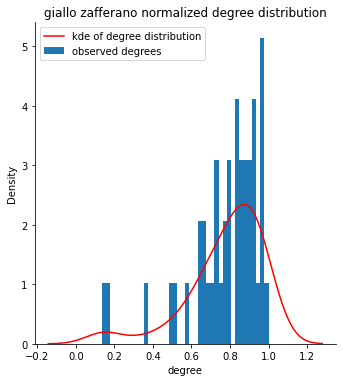

In [ ]:
giallo_graph = nx.convert_matrix.from_numpy_array(socio_giallo,parallel_edges = False)
mapping = dict([(i,giallo_ingredients[i]) for i in range(len(giallo_ingredients))])
giallo_graph = nx.relabel_nodes(giallo_graph, mapping)

giallo_deg = nx.degree_centrality(giallo_graph)

sns.displot(list(giallo_deg.values()),kind = 'kde',color = 'Red')#,kde = True)
plt.hist(list(giallo_deg.values()),bins = 40,density  = True,log = False)
plt.xlabel('degree')
plt.legend(['kde of degree distribution','observed degrees'])
plt.title('giallo zafferano normalized degree distribution')
plt.show()

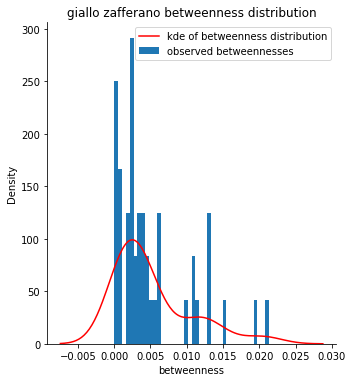

In [ ]:
giallo_graph = nx.convert_matrix.from_numpy_array(socio_giallo,parallel_edges = False)
mapping = dict([(i,giallo_ingredients[i]) for i in range(len(giallo_ingredients))])
giallo_graph = nx.relabel_nodes(giallo_graph, mapping)

giallo_bet = nx.betweenness_centrality(giallo_graph)

sns.displot(  list(giallo_bet.values())  ,kind = 'kde',color = 'Red')
plt.hist( list(giallo_bet.values())  ,bins = 40,density  = True,log = False)
plt.xlabel('betweenness')
plt.legend(['kde of betweenness distribution','observed betweennesses'])
plt.title('giallo zafferano betweenness distribution')
plt.show()

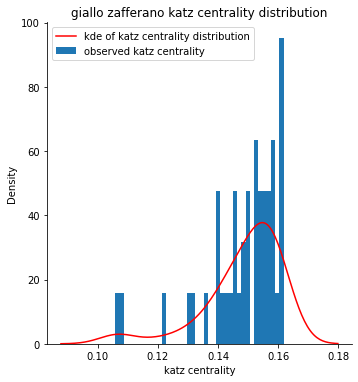

In [ ]:
giallo_graph = nx.convert_matrix.from_numpy_array(socio_giallo,parallel_edges = False)
mapping = dict([(i,giallo_ingredients[i]) for i in range(len(giallo_ingredients))])
giallo_graph = nx.relabel_nodes(giallo_graph, mapping)

giallo_katz = nx.katz_centrality_numpy(giallo_graph,alpha = 0.01)


sns.displot(  list(giallo_katz.values())  ,kind = 'kde',color = 'Red')
plt.hist( list(giallo_katz.values())  ,bins = 40,density  = True,log = False)
plt.xlabel('katz centrality')
plt.legend(['kde of katz centrality distribution','observed katz centrality'])
plt.title('giallo zafferano katz centrality distribution')
plt.show()

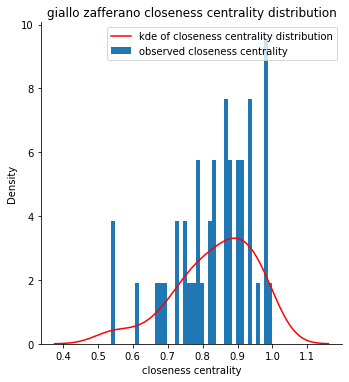

In [ ]:
giallo_graph = nx.convert_matrix.from_numpy_array(socio_giallo,parallel_edges = False)
mapping = dict([(i,giallo_ingredients[i]) for i in range(len(giallo_ingredients))])
giallo_graph = nx.relabel_nodes(giallo_graph, mapping)

giallo_close = nx.closeness_centrality(giallo_graph)


sns.displot(  list(giallo_close.values())  ,kind = 'kde',color = 'Red')
plt.hist( list(giallo_close.values())  ,bins = 40,density  = True,log = False)
plt.xlabel('closeness centrality')
plt.legend(['kde of closeness centrality distribution','observed closeness centrality'])
plt.title('giallo zafferano closeness centrality distribution')
plt.show()

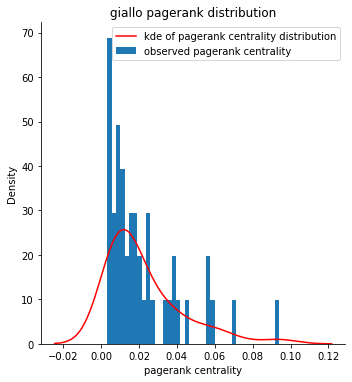

In [ ]:
giallo_graph = nx.convert_matrix.from_numpy_array(socio_giallo,parallel_edges = False)
mapping = dict([(i,giallo_ingredients[i]) for i in range(len(giallo_ingredients))])
giallo_graph = nx.relabel_nodes(giallo_graph, mapping)
giallo_pr = nx.pagerank(giallo_graph)


sns.displot(  list(giallo_pr.values())  ,kind = 'kde',color = 'Red')
plt.hist( list(giallo_pr.values())  ,bins = 40,density  = True,log = False)
plt.xlabel('pagerank centrality')
plt.legend(['kde of pagerank centrality distribution','observed pagerank centrality'])
plt.title('giallo pagerank distribution')
plt.show()

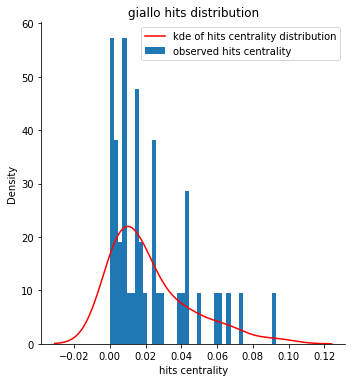

In [ ]:
giallo_graph = nx.convert_matrix.from_numpy_array(socio_giallo,parallel_edges = False)
mapping = dict([(i,giallo_ingredients[i]) for i in range(len(giallo_ingredients))])
giallo_graph = nx.relabel_nodes(giallo_graph, mapping)
giallo_hits = nx.hits(giallo_graph)[0]


sns.displot(  list(giallo_hits.values())  ,kind = 'kde',color = 'Red')
plt.hist( list(giallo_hits.values())  ,bins = 40,density  = True,log = False)
plt.xlabel('hits centrality')
plt.legend(['kde of hits centrality distribution','observed hits centrality'])
plt.title('giallo hits distribution')
plt.show()

In [ ]:
print('edge density: ',nx.classes.function.density(giallo_graph))

edge density:  0.7777777777777778


# Tasty analysis

In [ ]:
# import matrices directly from drive
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns


df_tasty = pd.read_csv('sociotasty.csv')#,index_col = 0)
df_tasty.index = df_tasty.columns
socio_tasty = df_tasty.to_numpy()
tasty_ingredients = list(df_tasty.index)

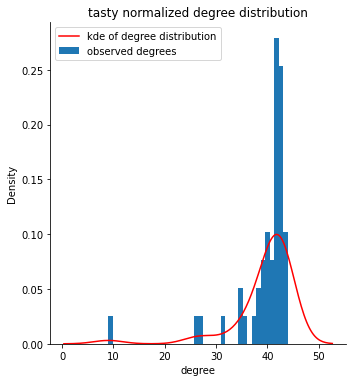

In [ ]:
tasty_graph = nx.convert_matrix.from_numpy_array(socio_tasty,parallel_edges = False)
mapping = dict([(i,tasty_ingredients[i]) for i in range(len(tasty_ingredients))])
tasty_graph = nx.relabel_nodes(tasty_graph, mapping)

tasty_deg = dict(tasty_graph.degree) #nx.degree_centrality(tasty_graph)

sns.displot(list(tasty_deg.values()),kind = 'kde',color = 'Red')#,kde = True)
plt.hist(list(tasty_deg.values()),bins = 40,density  = True,log = False)
plt.xlabel('degree')
plt.legend(['kde of degree distribution','observed degrees'])
plt.title('tasty normalized degree distribution')
plt.show()

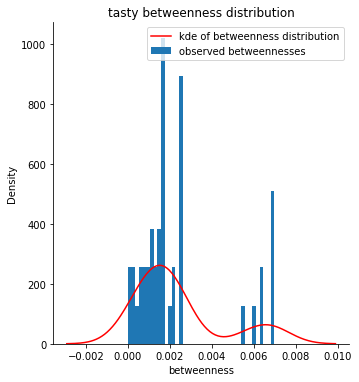

In [ ]:
tasty_bet = nx.centrality.betweenness_centrality(tasty_graph)

sns.displot(  list(tasty_bet.values())  ,kind = 'kde',color = 'Red')
plt.hist( list(tasty_bet.values())  ,bins = 40,density  = True,log = False)
plt.xlabel('betweenness')
plt.legend(['kde of betweenness distribution','observed betweennesses'])
plt.title('tasty betweenness distribution')
plt.show()

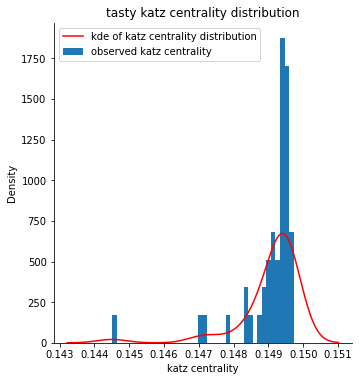

In [ ]:
tasty_katz = nx.katz_centrality_numpy(tasty_graph,alpha = 0.001)


sns.displot(  list(tasty_katz.values())  ,kind = 'kde',color = 'Red')
plt.hist( list(tasty_katz.values())  ,bins = 40,density  = True,log = False)
plt.xlabel('katz centrality')
plt.legend(['kde of katz centrality distribution','observed katz centrality'])
plt.title('tasty katz centrality distribution')
plt.show()

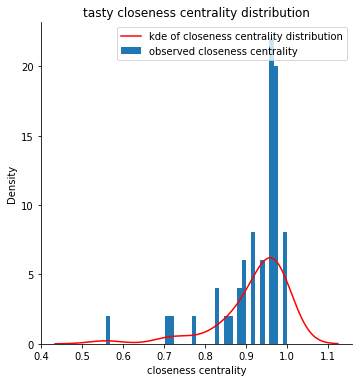

In [ ]:
tasty_close = nx.closeness_centrality(tasty_graph)


sns.displot(  list(tasty_close.values())  ,kind = 'kde',color = 'Red')
plt.hist( list(tasty_close.values())  ,bins = 40,density  = True,log = False)
plt.xlabel('closeness centrality')
plt.legend(['kde of closeness centrality distribution','observed closeness centrality'])
plt.title('tasty closeness centrality distribution')
plt.show()

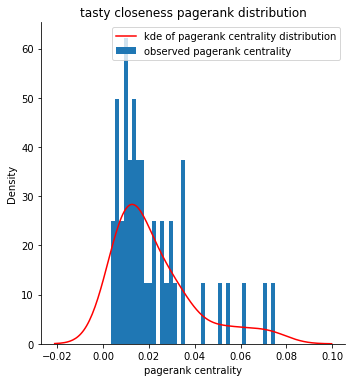

In [ ]:
tasty_pr = nx.pagerank(tasty_graph)


sns.displot(  list(tasty_pr.values())  ,kind = 'kde',color = 'Red')
plt.hist( list(tasty_pr.values())  ,bins = 40,density  = True,log = False)
plt.xlabel('pagerank centrality')
plt.legend(['kde of pagerank centrality distribution','observed pagerank centrality'])
plt.title('tasty closeness pagerank distribution')
plt.show()

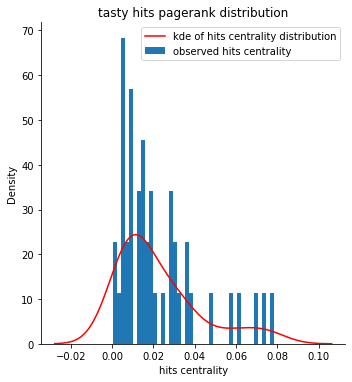

In [ ]:
tasty_hits = nx.hits(tasty_graph)[0]


sns.displot(  list(tasty_hits.values())  ,kind = 'kde',color = 'Red')
plt.hist( list(tasty_hits.values())  ,bins = 40,density  = True,log = False)
plt.xlabel('hits centrality')
plt.legend(['kde of hits centrality distribution','observed hits centrality'])
plt.title('tasty hits pagerank distribution')
plt.show()

[[1.         0.80925473]
 [0.80925473 1.        ]]


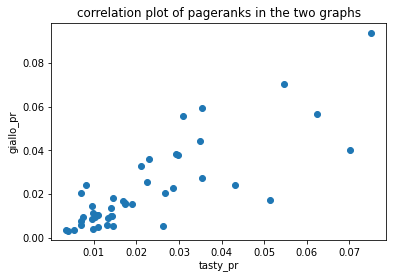

In [ ]:
xy  = np.array( [ (tasty_pr[ingr],giallo_pr[ingr]) for ingr in list(set(giallo_ingredients) & set(tasty_ingredients))  ]   )
xy_pd = pd.DataFrame(xy,index = list(set(giallo_ingredients) & set(tasty_ingredients)) ,columns = ['tasty deg','giallo deg'])

xy_corr = np.corrcoef(x = xy,rowvar = False)
print(xy_corr)

plt.scatter(x = xy[:,0],y = xy[:,1])
plt.xlabel('tasty_pr')
plt.ylabel('giallo_pr')
plt.title('correlation plot of pageranks in the two graphs')
plt.show()

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
xy_pd

,tasty deg,giallo deg
veggies,0.028552,0.023017
beef,0.010924,0.010606
honey,0.009795,0.011638
cinnamon,0.009590,0.008663
fruits,0.035299,0.027503
parsley,0.017366,0.015480
fish,0.007431,0.009694
alchool,0.014542,0.018146
pepper,0.062456,0.056494
legumes,0.026690,0.020597


In [ ]:
k = 20

top_k_giallo = list(sorted(giallo_pr.items(), key=lambda item: item[1],reverse = True))[:k]
top_k_giallo_names,top_k_giallo_values = [el[0] for el in top_k_giallo],[el[1] for el in top_k_giallo]

top_k_giallo = pd.DataFrame(  top_k_giallo_values, index = top_k_giallo_names ,columns = ['pagerank'] )

top_k_giallo

,pagerank
salt,0.093786
oil,0.070322
egg,0.059326
pepper,0.056494
flour,0.055661
cheese,0.044412
water,0.040108
butter,0.038205
nuts,0.037845
sugar,0.036092


In [ ]:
k = 20

top_k_tasty = list(sorted(tasty_pr.items(), key=lambda item: item[1],reverse = True))[:k]
top_k_tasty_names,top_k_tasty_values = [el[0] for el in top_k_tasty],[el[1] for el in top_k_tasty]

top_k_tasty = pd.DataFrame(  top_k_tasty_values, index = top_k_tasty_names ,columns = ['pagerank'] )

top_k_tasty

,pagerank
salt,0.075031
water,0.070205
pepper,0.062456
oil,0.054702
garlic,0.051346
onion,0.043186
egg,0.035305
fruits,0.035299
cheese,0.034906
flour,0.030856


In [ ]:
# common ingredients in the top 20

xy  = np.array( [ (top_k_tasty.loc[ingr],top_k_giallo.loc[ingr]) for ingr in list(set(top_k_giallo_names) & set(top_k_tasty_names))  ]   )[:,:,0]
xy_pd = pd.DataFrame(xy,index = list(set(top_k_giallo_names) & set(top_k_tasty_names)) ,columns = ['tasty pr','giallo pr'])

xy_pd

,tasty pr,giallo pr
tomato,0.022497,0.025558
water,0.070205,0.040108
veggies,0.028552,0.023017
nuts,0.029709,0.037845
garlic,0.051346,0.017494
milk,0.021116,0.032934
fruits,0.035299,0.027503
flour,0.030856,0.055661
butter,0.029405,0.038205
salt,0.075031,0.093786


In [ ]:
print('edge density: ',nx.classes.function.density(tasty_graph))

edge density:  0.898989898989899


In [ ]:
giallo_graph = nx.convert_matrix.from_numpy_array(socio_giallo,parallel_edges = False)
mapping = dict([(i,giallo_ingredients[i]) for i in range(len(giallo_ingredients))])
giallo_graph = nx.relabel_nodes(giallo_graph, mapping)

nx.community.greedy_modularity_communities(giallo_graph)

[frozenset({'alchool',
            'beef',
            'beer',
            'bread',
            'butter',
            'cinnamon',
            'corn',
            'fish',
            'flour',
            'fruits',
            'garlic',
            'milk',
            'mushrooms',
            'mustard',
            'oil',
            'onion',
            'parsley',
            'pasta',
            'pepper',
            'pork',
            'potato',
            'salt',
            'seafood',
            'tomato',
            'veggies',
            'vinegar',
            'water',
            'white meat',
            'wine',
            'yeast'}),
 frozenset({'cereals',
            'cheese',
            'chili',
            'chocolate',
            'coffee',
            'cream',
            'egg',
            'ginger',
            'honey',
            'legumes',
            'nuts',
            'paprika',
            'rice',
            'sugar',
            'turmeric'})]

In [ ]:
tasty_graph = nx.convert_matrix.from_numpy_array(socio_tasty,parallel_edges = False)
mapping = dict([(i,tasty_ingredients[i]) for i in range(len(tasty_ingredients))])
tasty_graph = nx.relabel_nodes(tasty_graph, mapping)

nx.community.greedy_modularity_communities(tasty_graph)

[frozenset({'alchool',
            'beef',
            'beer',
            'cereals',
            'cheese',
            'chili',
            'corn',
            'cream',
            'fish',
            'fruits',
            'garlic',
            'ginger',
            'legumes',
            'mushrooms',
            'mustard',
            'nuts',
            'oil',
            'onion',
            'paprika',
            'parsley',
            'pasta',
            'pepper',
            'potato',
            'rice',
            'seafood',
            'tomato',
            'turmeric',
            'veggies',
            'vinegar',
            'white meat',
            'wine'}),
 frozenset({'bread',
            'butter',
            'chocolate',
            'cinnamon',
            'coffee',
            'egg',
            'flour',
            'honey',
            'milk',
            'pork',
            'salt',
            'sugar',
            'water',
            'yeast'})]

Il maiale è in mezzo ad alimenti tipicamente dolci in tasty, come la cannella.